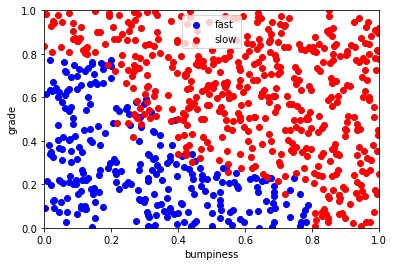

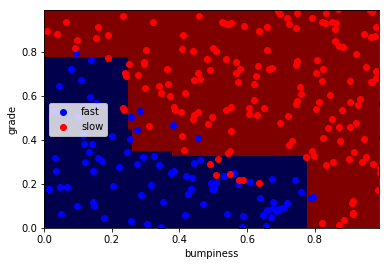

In [15]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.metrics import accuracy_score
from sklearn import svm

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0,min_samples_split =50)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(labels_test, pred)



try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


In [14]:
accuracy_score(labels_test, pred)

0.92

In [16]:
regr = svm.SVR()

In [17]:
regr.fit(features_train, labels_train)

C:\Users\KISHORE\Anaconda3\envs\py27\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred = regr.predict(features_test)

In [19]:
accuracy_score(labels_test, pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [26]:
clf = svm.SVC(C = 100000)

In [27]:
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(labels_test, pred)

0.944